In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
# Load data
def load_data(filepath="D:\DataSets\house price dataset.csv"):
    try:
        df = pd.read_csv(filepath)
        df.columns = df.columns.str.strip()  # Remove leading/trailing spaces from column names
        print("Data loaded successfully.")
        print("Column names:", df.columns)  # Print column names for debugging
        return df
    except FileNotFoundError:
        print(f"File not found: {filepath}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\aagen\AppData\Local\Temp\ipykernel_16236\1348340963.py:2: SyntaxWarning: invalid escape sequence '\D'
  def load_data(filepath="D:\DataSets\house price dataset.csv"):


In [8]:
# Preprocess data
def preprocess_data(df):
    if df is None:
        return None, None, None, None
    df = df.dropna()
    df = df[df['price'] > 0]  # Remove rows with price 0
    X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']]
    y = df['price']
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

In [10]:
# Evaluate model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse

Data loaded successfully.
Column names: Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')
                   date      price  bedrooms  bathrooms  sqft_living  \
0  2014-05-02 00:00:00    313000.0       3.0       1.50         1340   
1  2014-05-02 00:00:00   2384000.0       5.0       2.50         3650   
2  2014-05-02 00:00:00    342000.0       3.0       2.00         1930   
3  2014-05-02 00:00:00    420000.0       3.0       2.25         2000   
4  2014-05-02 00:00:00    550000.0       4.0       2.50         1940   

   sqft_lot  floors  waterfront  view  condition  sqft_above  sqft_basement  \
0      7912     1.5           0     0          3        1340              0   
1      9050     2.0           0     4          5        3370            280   
2     11947     1.0      

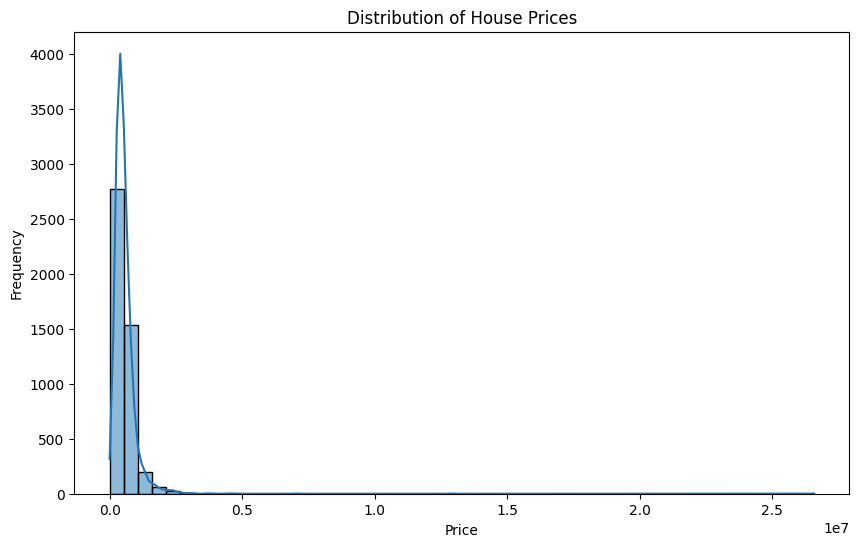

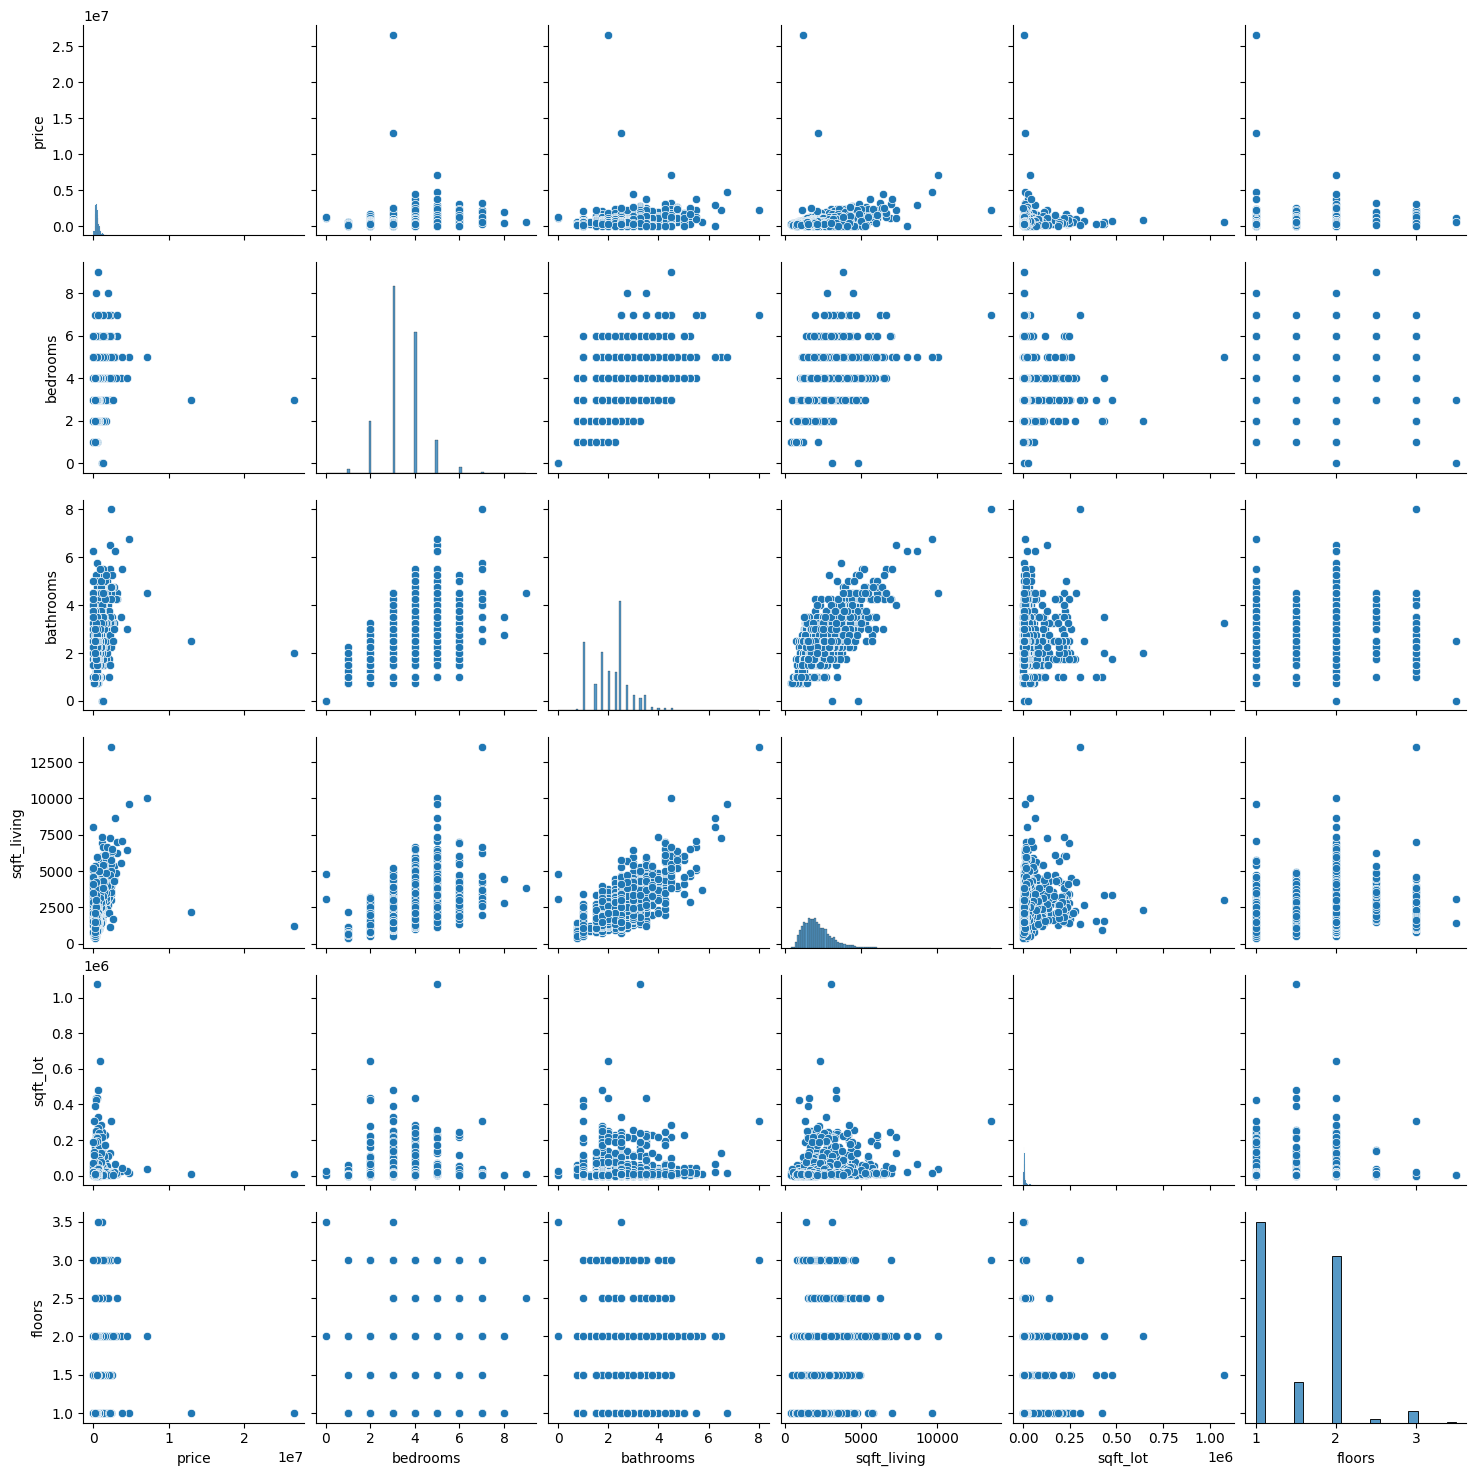

Mean Squared Error: 68849753156.90346


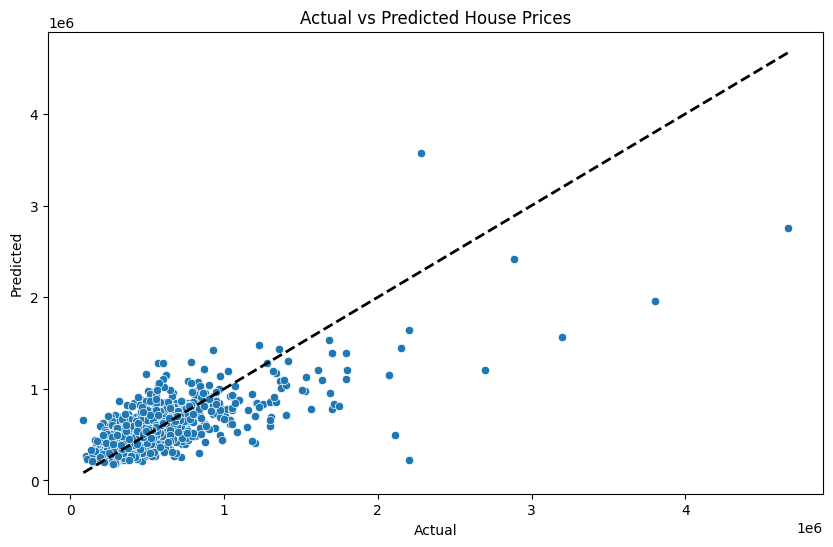

Program completed.


In [11]:
# Main script
if __name__ == "__main__":
    # Load and preprocess data
    data = load_data()
    if data is not None:
        print(data.head())  # Print the first few rows of the dataframe to ensure it's loaded correctly

        # Check if 'price' column exists
        if 'price' in data.columns:
            # Visualize data
            plt.figure(figsize=(10, 6))
            sns.histplot(data['price'], bins=50, kde=True)
            plt.title('Distribution of House Prices')
            plt.xlabel('Price')
            plt.ylabel('Frequency')
            plt.show()

            sns.pairplot(data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']])
            plt.show()

            X_train, X_test, y_train, y_test = preprocess_data(data)

            if X_train is not None:
                # Train model
                model = train_model(X_train, y_train)

                # Evaluate model
                mse = evaluate_model(model, X_test, y_test)
                print(f'Mean Squared Error: {mse}')

                # Plot predictions vs actual values using seaborn
                predictions = model.predict(X_test)
                plt.figure(figsize=(10, 6))
                sns.scatterplot(x=y_test, y=predictions)
                plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
                plt.xlabel('Actual')
                plt.ylabel('Predicted')
                plt.title('Actual vs Predicted House Prices')
                plt.show()
            else:
                print("Data preprocessing failed.")
        else:
            print("Column 'price' not found in the dataset.")
    else:
        print("Data loading failed.")
    
    print("Program completed.")